In [2]:
#Reference: https://www.kaggle.com/datasets/slashtea/kdd-cyberattack?resource=download

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [38]:
df  = pd.read_csv("C://Users//user//OneDrive//Desktop//dataset1.csv")

In [39]:
df.head(3)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


In [40]:
df.shape

(494021, 42)

In [41]:
#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [42]:
df.drop_duplicates(keep=False,inplace=True)

In [43]:
df.shape

(126209, 42)

In [44]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate
count,126209.000000,1.262090e+05,1.262090e+05,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,...,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000,126209.000000
mean,139.222401,9.163128e+03,3.277630e+03,0.000143,0.021456,0.000055,0.113502,0.000594,0.563003,0.029174,...,171.625233,144.768519,0.615675,0.057297,0.097112,0.020529,0.235537,0.234966,0.094591,0.091285
std,1273.960047,1.955136e+06,6.529856e+04,0.011942,0.247802,0.010902,1.530654,0.030701,0.496017,3.556349,...,101.302335,113.076125,0.444179,0.144909,0.241186,0.058364,0.422034,0.423035,0.283884,0.281010
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,14.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.070000e+02,2.970000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,189.000000,0.990000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000e+02,1.483000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.040000,0.020000,0.020000,0.010000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.labels = le.fit_transform(df.labels)
df.protocoltype = le.fit_transform(df.protocoltype)
df.service = le.fit_transform(df.service)
df.flag = le.fit_transform(df.flag)

In [46]:
df.head(3)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['dstbytes','srcbytes','count','srvcount','srvdiffhostrate','dsthostcount','dsthostsrvcount','dsthostsamesrcportrate','dsthostsrvdiffhostrate']] = StandardScaler().fit_transform(df[['dstbytes','srcbytes','count','srvcount','srvdiffhostrate','dsthostcount','dsthostsrvcount','dsthostsamesrcportrate','dsthostsrvdiffhostrate']])

In [48]:
df.head(3)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,1,22,9,-0.004594,0.033268,0,0,0,0,...,-1.200687,1.0,0.0,0.053437,-0.351739,0.0,0.0,0.0,0.0,11
1,0,1,22,9,-0.004564,-0.042752,0,0,0,0,...,-1.112251,1.0,0.0,-0.195334,-0.351739,0.0,0.0,0.0,0.0,11
2,0,1,22,9,-0.004567,-0.029719,0,0,0,0,...,-1.023815,1.0,0.0,-0.278258,-0.351739,0.0,0.0,0.0,0.0,11


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = df[['srcbytes','dstbytes']]
y = df[['labels']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
y_test.head(5)

,labels
89662,11
26520,11
357823,9
108079,11
371900,11


In [51]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [52]:
y_pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, y_pred)

0.9532849491332045

In [56]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision_score(y_test, y_pred, pos_label='positive', average='micro')

In [100]:
from sklearn.metrics import precision_score

In [62]:
from sklearn.metrics import recall_score

In [66]:
recall_score(y_test, y_pred, pos_label='positive', average='micro')

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9532849491332045

In [67]:
from sklearn.metrics import f1_score

In [68]:
f1_score(y_test, y_pred, pos_label='positive', average='micro')

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


0.9532849491332045

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

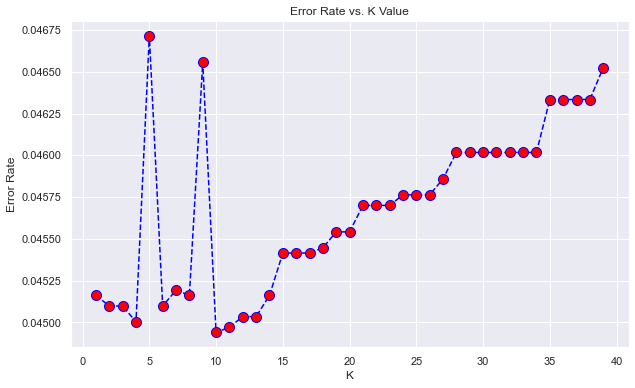

Minimum error:- 0.04494025924634737 at K = 10


In [69]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [70]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [71]:
y_pred = knn.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred)

0.9550597407536526

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

In [74]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [75]:
X = df[['srcbytes','dstbytes']]
Y = df[['labels']]

In [76]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )

In [78]:
X_train.shape 
print()

X_test.shape  
print()

(88346, 2)

(37863, 2)

In [79]:
ct = dtree(
           criterion="gini",    
           max_depth=None      
           )

In [80]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [81]:
Y_pred = ct.predict(X_test)

In [82]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.9549164091593376


<Figure size 864x504 with 0 Axes>

[Text(249.11942811077392, 369.32823529411763, 'X[0] <= -0.005\ngini = 0.46\nsamples = 88346\nvalue = [587, 21, 6, 37, 8, 358, 12, 6, 5, 24884, 110\n59917, 2, 3, 106, 263, 7, 498, 319, 2, 600, 581\n14]'),
 Text(42.675569044006075, 346.94470588235293, 'X[0] <= -0.005\ngini = 0.246\nsamples = 28885\nvalue = [0, 6, 2, 0, 5, 62, 12, 2, 2, 24884, 16, 3132\n0, 0, 0, 261, 1, 487, 0, 0, 0, 0, 13]'),
 Text(34.546889226100156, 324.56117647058824, 'X[1] <= -0.05\ngini = 0.236\nsamples = 28704\nvalue = [0, 6, 2, 0, 5, 62, 12, 2, 2, 24884, 16, 3130\n0, 0, 0, 203, 1, 366, 0, 0, 0, 0, 13]'),
 Text(30.482549317147196, 302.1776470588235, 'gini = 0.233\nsamples = 28639\nvalue = [0, 0, 0, 0, 5, 57, 12, 0, 0, 24884, 16, 3096\n0, 0, 0, 203, 0, 366, 0, 0, 0, 0, 0]'),
 Text(38.611229135053115, 302.1776470588235, 'X[1] <= 78.694\ngini = 0.669\nsamples = 65\nvalue = [0, 6, 2, 0, 0, 5, 0, 2, 2, 0, 0, 34, 0, 0\n0, 0, 1, 0, 0, 0, 0, 0, 13]'),
 Text(34.546889226100156, 279.7941176470588, 'X[1] <= -0.022\ngini = 0.5

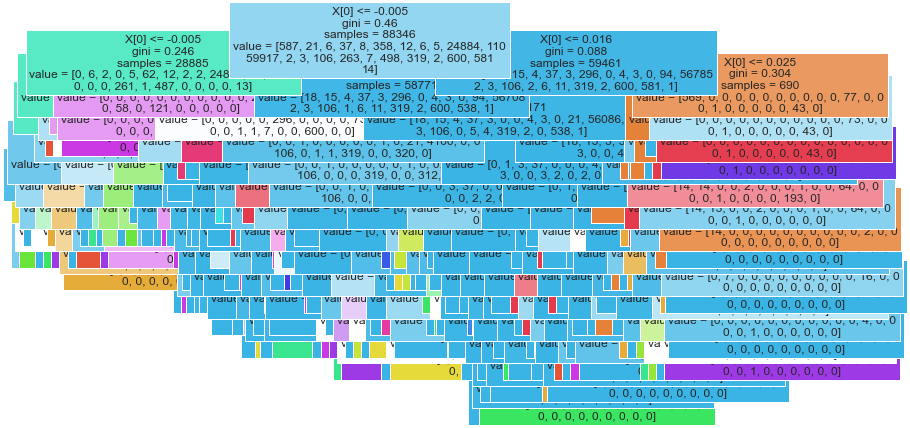

In [83]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [85]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Temp/ipykernel_11656/716668125.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [86]:
Yhat = clf.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[ 0 11  9 ... 17 11 11]
MAE: 0.132


In [87]:
Y_pred=clf.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(Y_test, Y_pred)

0.9552069302485275

In [90]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['srcbytes','dstbytes']).sort_values(ascending=False)
feature_imp

srcbytes    0.641425
dstbytes    0.358575
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


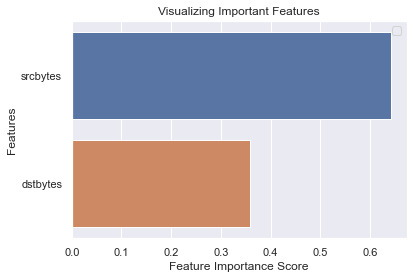

In [91]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [92]:
#Random Forrest gives highest accuracy